# Word Clouds 
Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.  
A Python package already exists in Python for generating word clouds. The package, called word_cloud was developed by Andreas Mueller.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


Word clouds are commonly used to perform high-level analysis and visualization of text data. Accordinly, let's digress from the immigration dataset and work with an example that involves analyzing text data. Let's try to analyze a short novel written by Lewis Carroll titled Alice's Adventures in Wonderland. Let's go ahead and download a .txt file of the novel.

In [2]:
alice_novel = open('../Word Cloud/alice_novel.txt', 'r').read()    
print ('File found and open')

File found and open


Next, let's use the **stopwords function** that we imported from word_cloud. We use the function set to remove any redundant stopwords.

In [3]:
stopwords = set(STOPWORDS)

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.

In [4]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

alice_wc.generate(alice_novel)

Now that the word cloud is created, let's visualize it.

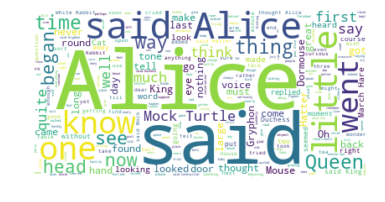

In [5]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Interesting! So in the first 2000 words in the novel, the most common words are Alice, said, little, Queen, and so on. Let's resize the cloud so that we can see the less frequent words a little better.

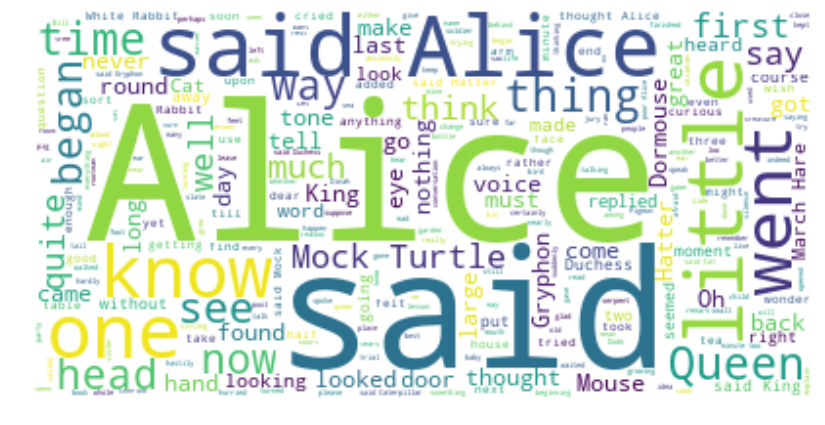

In [6]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Much better! However, said isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.

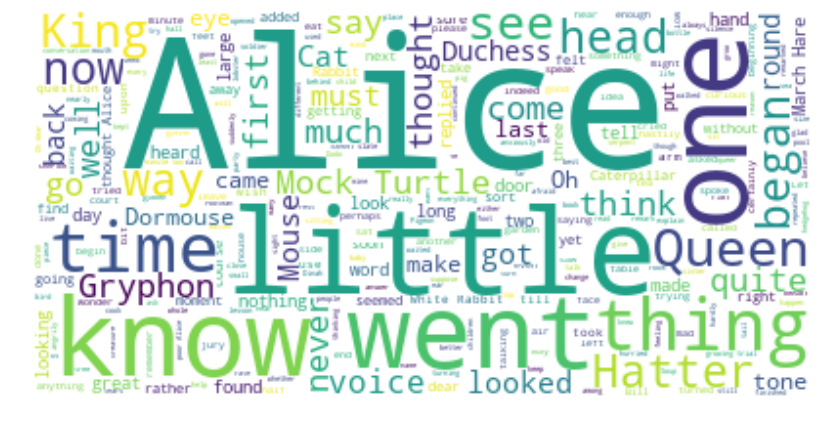

In [7]:
stopwords.add('said') # add the words said to stopwords

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Excellent! This looks really interesting! Another cool thing you can implement with the word_cloud package is superimposing the words onto a mask of any shape.   
Let's use a mask of Alice and her rabbit. We already created the mask for you, so let's go ahead and download it and call it alice_mask.png.

In [8]:
# download image
#!wget --quiet https://ibm.box.com/shared/static/3mpxgaf6muer6af7t1nvqkw9cqj85ibm.png -O alice_mask.png
    
# save mask to alice_mask
alice_mask = np.array(Image.open('../Word Cloud/alice_mask.png'))    
print('Image downloaded and saved!')

Image downloaded and saved!


Shaping the word cloud according to the mask is straightforward using word_cloud package. For simplicity, we will continue using the first 2000 words in the novel.

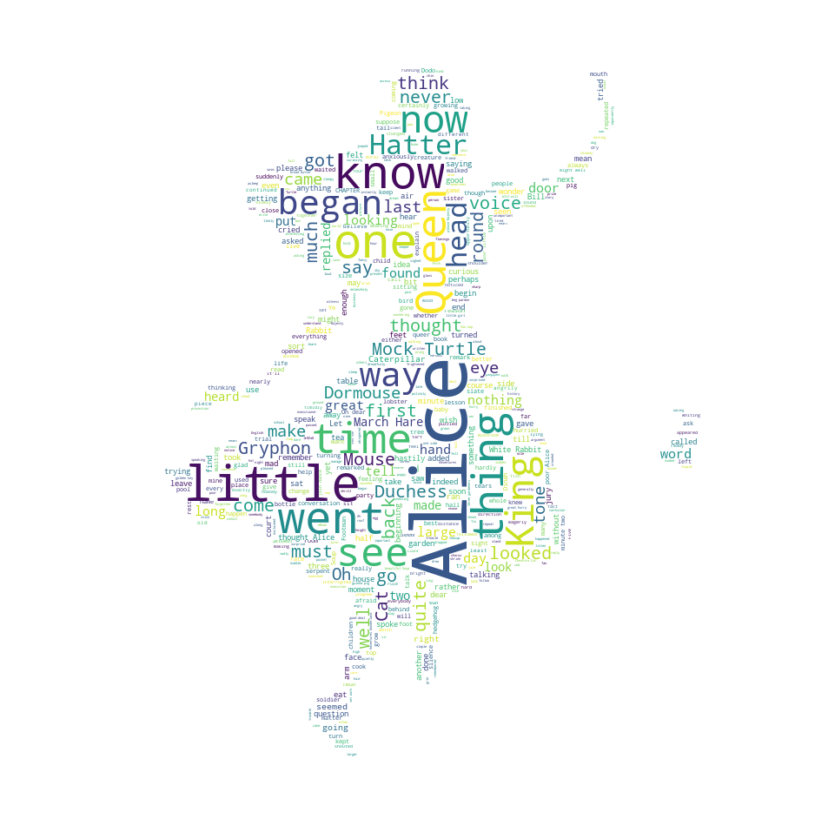

In [9]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()